In [310]:
from fastai.vision.all import *
import os

In [62]:
files = get_image_files("lumos_datathon/archive/img_align_celeba")
len(files)

202599

In [362]:
import pandas as pd
def get_labels(row):
    return ",".join(list(columns[row]))

columns = df_att.columns

df_eval = pd.read_csv("eval_data_public.csv")
df_train = pd.read_csv("train_data.csv")
df_att = pd.read_csv("list_attr_celeba.csv").set_index("image_id")
df_att = df_att.replace({-1:0})

s_eval = df_eval.set_index("id")["16_image_ids"]
df_train = df_train.set_index("id")[["16_image_ids","anomalous_image_id","attributes"]]
for col in columns:
    df_att[col] = df_att[col].apply(bool)
    
eval_set = set()
for idx in range(len(df_eval)):
    ids = df_eval.iloc[idx]["16_image_ids"].split(" ")
    eval_set = tset.union(set(ids))
    
train_labels = list(set(df_att.index).difference(eval_set))
val_labels = list(eval_set)

In [348]:
all_label_list = list(df_att.apply(get_labels,axis=1))
train_label_list = list(df_att.loc[train_labels].apply(get_labels,axis=1))
val_label_list = list(df_att.loc[val_labels].apply(get_labels,axis=1))

path = "lumos_datathon/archive/img_align_celeba"
df_train2 = pd.DataFrame.from_dict({"name": train_labels, "labels": train_label_list})
train_dls = ImageDataLoaders.from_df(df_train2, path,label_delim=",")

full_df = pd.DataFrame.from_dict({"name": list(df_att.index), "labels": all_label_list})
full_dls = ImageDataLoaders.from_df(df, path,label_delim=",")

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [351]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'
learn = vision_learner(train_dls, resnet34, metrics=[partial(accuracy_multi, thresh=0.5) ,f1_macro,  f1_samples])

# learn.lr_find()
learn.fine_tune(6, 0.003)

epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.247010,0.227416,0.899607,0.583928,0.730130,09:29


epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.209201,0.196512,0.913952,0.665402,0.773214,10:26
1,0.201654,0.188480,0.917340,0.696402,0.782011,10:22
2,0.189219,0.183523,0.919741,0.718605,0.789894,10:25
3,0.176168,0.179457,0.921580,0.732842,0.799406,10:23
4,0.157278,0.181385,0.921811,0.735427,0.799810,10:49
5,0.141374,0.186997,0.920408,0.736592,0.799437,11:43


C:\Users\Magnus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


,target,predicted,probabilities,loss
0,Attractive;Big_Nose;Brown_Hair;Bushy_Eyebrows;Heavy_Makeup;High_Cheekbones;No_Beard;Oval_Face;Pointy_Nose;Receding_Hairline;Smiling;Wavy_Hair;Wearing_Earrings;Wearing_Lipstick;Wearing_Necklace;Young,Attractive;Brown_Hair;No_Beard;Wearing_Earrings;Wearing_Necklace;Young,"TensorBase([6.4826e-05, 1.5391e-02, 5.0204e-01, 1.7069e-03, 4.1174e-07, 1.0481e-04,\n 3.6328e-02, 3.0767e-03, 6.9239e-03, 6.1421e-04, 2.4893e-01, 6.1743e-01,\n 2.7061e-02, 2.0947e-04, 7.3791e-06, 1.9802e-05, 1.6745e-05, 1.1160e-06,\n 1.4622e-02, 2.1157e-02, 1.7891e-04, 1.7175e-03, 1.3140e-05, 1.3230e-02,\n 9.9966e-01, 1.5733e-01, 1.2838e-04, 1.6923e-01, 8.5637e-04, 3.1567e-04,\n 4.7382e-05, 5.2386e-02, 7.8467e-02, 6.7819e-02, 8.5845e-01, 6.3967e-04,\n 7.7921e-02, 6.1332e-01, 6.0571e-07, 9.9850e-01])",0.9653558731079102
1,Arched_Eyebrows;No_Beard;Receding_Hairline;Young,Arched_Eyebrows;Big_Lips;Big_Nose;Blond_Hair;Heavy_Makeup;High_Cheekbones;Mouth_Slightly_Open;No_Beard;Rosy_Cheeks;Smiling;Wavy_Hair;Wearing_Earrings;Wearing_Lipstick;Wearing_Necklace;Young,"TensorBase([2.8419e-06, 9.8157e-01, 2.6538e-01, 5.2970e-02, 5.6214e-05, 4.0364e-04,\n 5.1569e-01, 6.9151e-01, 2.0414e-04, 9.5055e-01, 1.9210e-04, 1.7864e-03,\n 1.3305e-03, 6.5777e-02, 5.3294e-02, 2.5833e-05, 1.1477e-05, 8.0802e-03,\n 9.9300e-01, 9.8963e-01, 1.3044e-05, 9.7123e-01, 6.8059e-06, 2.3983e-01,\n 9.9999e-01, 1.2924e-01, 9.1595e-04, 9.6358e-02, 3.4353e-01, 5.4296e-01,\n 1.5095e-06, 9.9397e-01, 6.8722e-03, 7.7923e-01, 9.7053e-01, 5.3867e-06,\n 9.9797e-01, 6.4063e-01, 1.0512e-05, 9.2286e-01])",0.9580644965171814
2,Big_Nose;Brown_Hair;Chubby;Double_Chin;Gray_Hair;Male;Mouth_Slightly_Open;Sideburns;Smiling,5_o_Clock_Shadow;Blond_Hair;Male;Mouth_Slightly_Open;No_Beard;Smiling;Young,"TensorBase([6.7900e-01, 3.1675e-02, 2.6470e-01, 3.6186e-02, 1.0543e-04, 1.4723e-04,\n 4.5335e-02, 1.6539e-01, 2.4616e-03, 5.2498e-01, 1.9413e-03, 1.4474e-02,\n 3.8143e-03, 9.9408e-03, 2.0374e-02, 7.3612e-04, 1.3479e-03, 8.9154e-03,\n 1.8844e-03, 1.6176e-01, 9.9973e-01, 9.9965e-01, 4.5317e-04, 1.9278e-02,\n 5.8589e-01, 2.7343e-01, 2.5697e-03, 6.7223e-02, 1.3684e-01, 7.1918e-03,\n 2.4787e-03, 9.6389e-01, 1.7642e-01, 1.2000e-02, 6.3731e-04, 1.3902e-05,\n 2.1598e-03, 1.0040e-03, 1.0332e-01, 9.4719e-01])",0.8124834895133972
3,Attractive;Big_Lips;Brown_Hair;Heavy_Makeup;Mouth_Slightly_Open;No_Beard;Oval_Face;Wavy_Hair;Wearing_Lipstick;Young,Black_Hair;No_Beard;Young,"TensorBase([4.3478e-06, 1.2920e-02, 7.5395e-02, 2.4472e-03, 3.7251e-08, 1.2537e-02,\n 5.5294e-02, 4.5634e-03, 9.5029e-01, 6.0252e-06, 1.5449e-02, 2.9974e-03,\n 4.3674e-03, 8.1893e-04, 4.7598e-06, 1.0827e-04, 1.3550e-06, 4.5397e-07,\n 3.5732e-03, 9.4260e-03, 3.1156e-04, 1.4709e-01, 2.5084e-06, 3.6663e-01,\n 9.9998e-01, 3.8780e-02, 3.0578e-04, 3.9289e-02, 7.1714e-04, 1.0384e-05,\n 1.2815e-06, 3.3876e-03, 8.1792e-02, 9.7553e-02, 1.9770e-01, 2.7515e-04,\n 2.8707e-02, 3.3275e-01, 1.9887e-07, 9.9884e-01])",0.8061415553092957
4,Goatee;High_Cheekbones;Male;Mouth_Slightly_Open;Narrow_Eyes;Smiling;Wearing_Hat;Young,Male;No_Beard,"TensorBase([1.2231e-02, 1.4487e-03, 2.8374e-02, 1.0969e-02, 1.6428e-03, 5.3997e-04,\n 3.2309e-02, 7.4985e-03, 9.0232e-02, 1.6483e-04, 1.5722e-01, 7.1739e-03,\n 5.2071e-05, 8.4844e-04, 3.0956e-04, 8.2743e-05, 4.8296e-04, 8.0763e-05,\n 1.6481e-03, 2.0333e-02, 9.9002e-01, 1.3803e-01, 1.8160e-04, 1.0787e-01,\n 9.7584e-01, 2.2423e-02, 4.8540e-04, 3.9306e-01, 6.5934e-03, 6.1247e-05,\n 9.3109e-05, 3.3338e-03, 4.1353e-03, 8.9666e-02, 3.4952e-02, 6.1103e-03,\n 4.2010e-03, 6.3185e-03, 5.0335e-03, 4.1412e-01])",0.8050550818443298
5,Attractive;Black_Hair;Bushy_Eyebrows;Oval_Face;Pale_Skin;Pointy_Nose;Receding_Hairline;Wearing_Earrings;Young,Attractive;Blond_Hair;No_Beard;Pointy_Nose;Straight_Hair;Young,"TensorBase([6.9271e-04, 1.0587e-02, 8.1169e-01, 1.2036e-02, 2.0878e-05, 3.3997e-04,\n 2.9595e-02, 2.5173e-03, 1.9033e-03, 8.5217e-01, 5.9973e-03, 3.9770e-02,\n 7.0462e-03, 1.8293e-04, 2.1487e-05, 8.7337e-05, 6.5770e-04, 1.3897e-

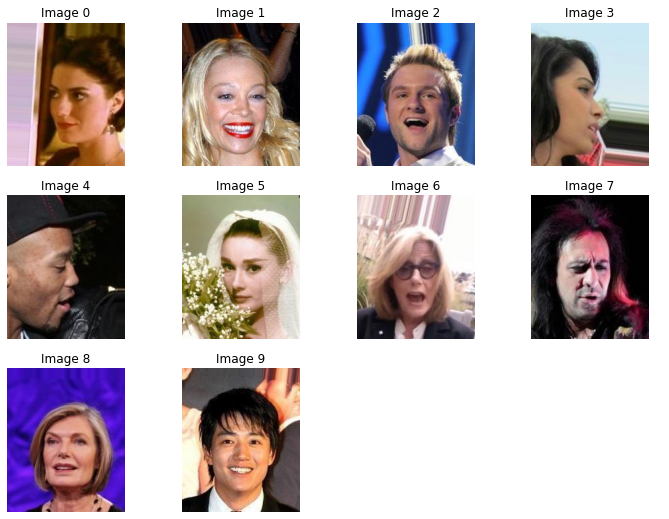

In [352]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(10)

In [353]:
learn.export(f"{os.getcwd()}/learners/multi_model_no_eval.pkl")

TensorBase([[2.6124e-06, 6.6101e-01, 9.9926e-01,  ..., 3.3655e-02, 6.9273e-07,
         9.9990e-01],
        [1.0158e-03, 1.9598e-01, 5.2362e-01,  ..., 6.5693e-02, 8.7374e-04,
         7.4637e-01],
        [3.8924e-02, 6.5816e-03, 1.3395e-01,  ..., 3.6568e-02, 1.0738e-04,
         9.6467e-01],
        ...,
        [3.7731e-01, 6.5669e-04, 3.1416e-01,  ..., 2.4649e-03, 4.5207e-03,
         9.2865e-01],
        [1.0659e-03, 9.1934e-01, 9.9400e-01,  ..., 8.2653e-02, 1.1593e-04,
         9.8455e-01],
        [3.3510e-06, 9.6099e-01, 9.8794e-01,  ..., 1.7323e-01, 5.4931e-06,
         9.8828e-01]])

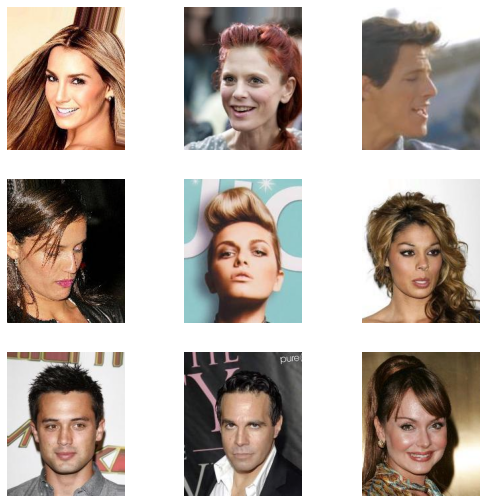

In [355]:
dl = learn.dls.test_dl(files)
dl.show_batch()
preds = learn.get_preds(dl=dl)
preds = preds[0]
preds

In [357]:
preds

TensorBase([[2.6124e-06, 6.6101e-01, 9.9926e-01,  ..., 3.3655e-02, 6.9273e-07,
         9.9990e-01],
        [1.0158e-03, 1.9598e-01, 5.2362e-01,  ..., 6.5693e-02, 8.7374e-04,
         7.4637e-01],
        [3.8924e-02, 6.5816e-03, 1.3395e-01,  ..., 3.6568e-02, 1.0738e-04,
         9.6467e-01],
        ...,
        [3.7731e-01, 6.5669e-04, 3.1416e-01,  ..., 2.4649e-03, 4.5207e-03,
         9.2865e-01],
        [1.0659e-03, 9.1934e-01, 9.9400e-01,  ..., 8.2653e-02, 1.1593e-04,
         9.8455e-01],
        [3.3510e-06, 9.6099e-01, 9.8794e-01,  ..., 1.7323e-01, 5.4931e-06,
         9.8828e-01]])

In [358]:
import pickle
with open('tensorpreds_all_no_eval.pkl', 'wb') as handle:
    pickle.dump(preds, handle, protocol=pickle.HIGHEST_PROTOCOL)
series_preds = pd.DataFrame.from_dict({"name":list(df_att.index),"preds":list(preds)}).set_index("name")["preds"]

# Pytorch

In [361]:
df_train

,name,labels
0,133836.jpg,"Big_Lips,Blond_Hair,Mouth_Slightly_Open,Narrow_Eyes,No_Beard,Pale_Skin,Smiling,Young"
1,121326.jpg,"Arched_Eyebrows,Attractive,Big_Lips,Blond_Hair,Heavy_Makeup,No_Beard,Wavy_Hair,Wearing_Earrings,Wearing_Lipstick,Wearing_Necklace,Young"
2,184498.jpg,"Bags_Under_Eyes,Black_Hair,High_Cheekbones,Male,Mouth_Slightly_Open,No_Beard,Oval_Face,Rosy_Cheeks,Smiling,Young"
3,182104.jpg,"Blond_Hair,Heavy_Makeup,High_Cheekbones,No_Beard,Pale_Skin,Smiling,Wavy_Hair,Wearing_Lipstick,Wearing_Necklace"
4,039007.jpg,"No_Beard,Wavy_Hair,Young"
...,...,...
184735,090856.jpg,"Attractive,Heavy_Makeup,No_Beard,Straight_Hair,Wearing_Lipstick,Wearing_Necklace,Young"
184736,062407.jpg,"No_Beard,Oval_Face,Wearing_Necklace,Young"
184737,202260.jpg,"5_o_Clock_Shadow,Bags_Under_Eyes,Big_Lips,Big_Nose,Black_Hair,Chubby,Double_Chin,Goatee,High_Cheekbones,Male,Mustache,Smiling,Wearing_Necktie"
184738,159065.jpg,"Attractive,Black_Hair,Heavy_Makeup,No_Beard,Oval_Face,Pale_Skin,Wavy_Hair,Wearing_Lipstick,Young"


# Pytorch Dataloader

In [381]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

def get_tensor_from_traindf(row):
    return torch.tensor(np.array([xid == row["anomalous_image_id"] for xid in row["16_image_ids"].split(" ")]).astype(float))
target_series = df_train.apply(get_tensor_from_traindf,axis=1)
df_train["target_series"]=target_series

Using cuda device


In [386]:
import os
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

learning_rate = 1e-3
batch_size = 64

class CustomDataset(Dataset):
    def __init__(self, series_preds, df_train):
        self.series_preds = series_preds
        self.df_train= df_train


    def __len__(self):
        return len(self.df_train)

    def __getitem__(self, idx):
        row = self.df_train.iloc[idx]
        image_ids = row["16_image_ids"].split(" ")
        target = row["target_series"]
        inp = torch.tensor(np.concatenate(self.series_preds.loc[image_ids]))
        return inp, target

    
# MAX_LEN = 10000
MAX_LEN = 157692
arr = np.arange(MAX_LEN)
np.random.shuffle(arr)
train_idx, val_idx = arr[:int(MAX_LEN*0.95)],arr[int(MAX_LEN*0.95):MAX_LEN]
train_dataset = CustomDataset(series_preds=series_preds,df_train=df_train.iloc[train_idx])
val_dataset = CustomDataset(series_preds=series_preds,df_train=df_train.iloc[val_idx])

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

# NN Prediction

In [387]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(16*40, 320),
            nn.ReLU(),
            nn.Linear(320, 160),
            nn.ReLU(),
            nn.Linear(160, 16),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
    
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X=X.to(device)
        y=y.to(device)
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X=X.to(device)
            y=y.to(device)
            pred = model(X)
            # print(pred.argmax(1))
            # print(y.argmax(1))
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    


In [401]:
epochs = 1
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(val_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.596812  [    0/149807]
loss: 0.500381  [ 6400/149807]
loss: 0.578732  [12800/149807]
loss: 0.734993  [19200/149807]
loss: 0.656395  [25600/149807]
loss: 0.445348  [32000/149807]
loss: 0.481457  [38400/149807]
loss: 0.528378  [44800/149807]
loss: 0.699269  [51200/149807]
loss: 0.571771  [57600/149807]
loss: 0.534601  [64000/149807]
loss: 0.785075  [70400/149807]
loss: 0.733374  [76800/149807]
loss: 0.401809  [83200/149807]
loss: 0.591003  [89600/149807]
loss: 0.677077  [96000/149807]
loss: 0.613400  [102400/149807]
loss: 0.677766  [108800/149807]
loss: 0.550958  [115200/149807]
loss: 0.533444  [121600/149807]
loss: 0.594635  [128000/149807]
loss: 0.650123  [134400/149807]
loss: 0.685987  [140800/149807]
loss: 0.721969  [147200/149807]
Test Error: 
 Accuracy: 67.6%, Avg loss: 1.158462 

Done!


In [398]:
torch.save(model,"models/ep9_noleak.pkl")

# Inference

In [399]:
tensors=[]
for idx in range(len(df_eval)):
    row = df_eval.iloc[idx]
    image_ids = row["16_image_ids"].split(" ")
    inp = torch.tensor(np.concatenate(series_preds.loc[image_ids])).reshape((1,640))
    tensors.append(inp)
    
tensors = torch.cat(tensors,dim=0)
tensors = tensors.to(device)
with torch.no_grad():
    eval_preds = model(tensors)
eval_label_list = list(eval_preds.argmax(1))
eval_label_list = [x.item() for x in eval_label_list]
result_df = pd.DataFrame.from_dict({"id":list(df_eval.index),"anomalous_image_index":eval_label_list})
result_df = result_df.set_index("id")

In [400]:
result_df.to_csv("result_csvs/ep9_noleak.csv")

# Misc

### Testing how many labels are in df_eval

In [311]:
df_eval

,Unnamed: 0,id,16_image_ids
0,0,0,043074.jpg 098193.jpg 057228.jpg 177965.jpg 107169.jpg 201854.jpg 010791.jpg 173536.jpg 016290.jpg 197111.jpg 009957.jpg 079606.jpg 168604.jpg 146938.jpg 057533.jpg 136392.jpg
1,1,1,117243.jpg 146269.jpg 078819.jpg 175087.jpg 164094.jpg 126541.jpg 138358.jpg 066338.jpg 039941.jpg 105282.jpg 156378.jpg 082406.jpg 166752.jpg 108423.jpg 084609.jpg 010414.jpg
2,2,2,190556.jpg 127936.jpg 188746.jpg 052913.jpg 151428.jpg 106815.jpg 017984.jpg 038680.jpg 040209.jpg 046447.jpg 121763.jpg 155190.jpg 101113.jpg 132641.jpg 078975.jpg 078688.jpg
3,3,3,140851.jpg 094591.jpg 088301.jpg 167308.jpg 017650.jpg 193498.jpg 129022.jpg 112882.jpg 187073.jpg 081348.jpg 063618.jpg 038680.jpg 014883.jpg 032897.jpg 032918.jpg 027999.jpg
4,4,4,169563.jpg 187030.jpg 039161.jpg 084870.jpg 057818.jpg 007078.jpg 166795.jpg 199476.jpg 191553.jpg 194898.jpg 069595.jpg 028794.jpg 165171.jpg 073865.jpg 097258.jpg 124281.jpg
...,...,...,...
1995,1995,1995,038405.jpg 040902.jpg 120390.jpg 179314.jpg 167286.jpg 080930.jpg 156307.jpg 130238.jpg 140065.jpg 013211.jpg 000249.jpg 043835.jpg 194001.jpg 155898.jpg 149574.jpg 082628.jpg
1996,1996,1996,118609.jpg 118915.jpg 121007.jpg 142873.jpg 095511.jpg 134995.jpg 050350.jpg 125053.jpg 143839.jpg 031918.jpg 189655.jpg 141234.jpg 093284.jpg 134860.jpg 155462.jpg 167316.jpg
1997,1997,1997,032428.jpg 041964.jpg 008267.jpg 037355.jpg 193931.jpg 091810.jpg 010357.jpg 156378.jpg 008510.jpg 145358.jpg 176281.jpg 150693.jpg 053993.jpg 110589.jpg 018085.jpg 197471.jpg
1998,1998,1998,065762.jpg 067961.jpg 099348.jpg 166162.jpg 117020.jpg 038117.jpg 096971.jpg 064392.jpg 046763.jpg 152823.jpg 077723.jpg 141147.jpg 058325.jpg 025617.jpg 188538.jpg 090470.jpg


# Unzipping

In [6]:
import zipfile
with zipfile.ZipFile("lumos-datathon.zip", 'r') as zip_ref:
    zip_ref.extractall("lumos_datathon")